# Language in Space

## Session 03: Tidyverse; Data preparation

### Gerhard Jäger

November 11, 2021


# Preprocessing data with *Tidyverse*

- *Tidyverse* is a collection of R-packages
- contain huge functionality for data science
- requires a certain discipline

## Getting the PAD metadata into tidy form

1. download the PAD data from Github
2. install tidyverse (`install.packages("tidyverse")`)

In [3]:
library(tidyverse)

path_to_pad = "data/PAD" # may be different on your computer

list.files(path_to_pad)

[1] "alignments"      "data"            "DATAPACKAGE.yml" "README.md"      
[5] "scripts"         "sources"

In [4]:
list.files(str_c(path_to_pad, "/data"))


[1] "cognatesets.csv" "doculects.csv"   "words.csv"

In [3]:
?read_tsv

In [5]:
words = read_tsv(paste0(path_to_pad, "/data/words.csv"), comment="#")
View(words)


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_double(),
  CONCEPT = col_character(),
  COUNTERPART = col_character(),
  CONCEPTID = col_double(),
  DOCULECT = col_character(),
  TOKENS = col_character(),
  COGID = col_double()
)




ID,CONCEPT,COUNTERPART,CONCEPTID,DOCULECT,TOKENS,COGID
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
10318,Affe,ɒːph,69,GrossMohrdorf,ɒː ph,1004
10319,Affe,ɔʿfɛ̠,69,GrossJamno,ɔʿ f ɛ̠,1004
10320,Affe,ɑf͡βə,69,Gottsbüren,ɑ f͡β ə,1004
10321,Affe,ɑ̟fə̜+,69,Offdilln,ɑ̟ f ə̜+,1004
10322,Affe,af,69,Iggingen,a f,1004
10323,Affe,a̠ːf͡ɸə,69,Odenspiel,a̠ː f͡ɸ ə,1004
10324,Affe,oʿːχ,69,Wasbek,oʿː χ,1004
10325,Affe,ɒːph,69,Jürgenshagen,ɒː ph,1004
10326,Affe,ɑ̟f,69,Herbornseelbach,ɑ̟ f,1004


In [5]:
doculects = read_tsv(paste0(path_to_pad, "/data/doculects.csv"), comment="#")
View(doculects)

Rows: 183 Columns: 6

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): NAME, SHORT_NAME, TRANSCRIPTOR
dbl (3): ID, LONGITUDE, LATITUDE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



ID,LONGITUDE,LATITUDE,NAME,SHORT_NAME,TRANSCRIPTOR
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
25987,6.61615,48.14471,DOCELLES,Docelles,NA
71182,11.40528,48.46679,SCHACHACH,Schachach,Angelika Braun
71399,11.95648,49.07279,PIELENHOFEN,Pielenhofen,Stern/Braun
71626,12.37579,48.58109,OBERVIEHBACH,Oberviehbach,Stern/Braun
72112,12.78140,49.01600,MAIBRUNN,Maibrunn,R. Lauf
72938,11.52376,49.59651,HARTENSTEIN,Hartenstein,Stern/Braun
73053,11.51153,48.63820,LANGENBRUCK,Langenbruck,Angelika Braun
73067,11.81097,48.19687,GELTING,Gelting,TEAM
74385,11.09074,48.58242,PÖTTMES,Pöttmes,Angelika Braun


In [6]:
cognatesets = read_tsv(paste0(path_to_pad, "/data/cognatesets.csv"), comment="#")
View(cognatesets) 

Rows: 186 Columns: 5

── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): COGNATE, WENKER_SENTENCE
dbl (3): COGNATE_ID, NUMBER_OF_WORDS, WENKER_ID


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



COGNATE,COGNATE_ID,NUMBER_OF_WORDS,WENKER_ID,WENKER_SENTENCE
<chr>,<dbl>,<dbl>,<dbl>,<chr>
abend,1001,147,24,"Als wir gestern Abend heim kamen, da lagen die anderen schon im Bett und waren fest eingeschlafen."
acht,1002,182,NA,NA
Aepfelchen,1003,189,26,Hinter unserem Hause stehen drei schöne Apfelbäume mit roten Äpfelchen.
Affe,1004,185,11,"Ich schlage dich gleich mit dem Kochlöffel um die Ohren, du Affe."
alle,1005,177,38,Die Leute sind heute alle draußen auf dem Feld und mähen.
als,1006,136,15,"Du hast heute am meisten gelernt und bist artig gewesen, du darfst früher nach Hause gehen als die anderen."
alte,1007,186,4,Der gute alte Mann ist mit dem Pferd auf dem Eis eingebrochen und in das kalte Wasser gefallen.
anderen,1008,57,15,"Du hast heute am meisten gelernt und bist artig gewesen, du darfst früher nach Hause gehen als die anderen."
anfaengt,1009,116,3,"Tu Kohlen in den Ofen, damit die Milch bald zu kochen anfängt."


In [7]:
class(words)



[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

- `tbl`is the *tidyverse* counterpart of base R's `data.frame` class
- mostly similiar but some difference
    - general policy:
        - each row is an observation, each column is a feature
    - strings are not parsed into factors
    - column names are kept as is

### Data exploration


In [8]:
summary(words)

       ID          CONCEPT          COUNTERPART          CONCEPTID  
 Min.   :    1   Length:31563       Length:31563       Min.   :  1  
 1st Qu.: 7892   Class :character   Class :character   1st Qu.: 54  
 Median :15782   Mode  :character   Mode  :character   Median :104  
 Mean   :15782                                         Mean   :103  
 3rd Qu.:23672                                         3rd Qu.:151  
 Max.   :31563                                         Max.   :203  
   DOCULECT            TOKENS              COGID     
 Length:31563       Length:31563       Min.   :1001  
 Class :character   Class :character   1st Qu.:1044  
 Mode  :character   Mode  :character   Median :1092  
                                       Mean   :1093  
                                       3rd Qu.:1139  
                                       Max.   :2000  

In [9]:
summary(doculects)

       ID           LONGITUDE         LATITUDE         NAME          
 Min.   : 25987   Min.   : 6.088   Min.   :47.45   Length:183        
 1st Qu.: 97872   1st Qu.: 8.715   1st Qu.:49.95   Class :character  
 Median :112685   Median :10.300   Median :51.05   Mode  :character  
 Mean   :120236   Mean   :10.363   Mean   :51.11                     
 3rd Qu.:128510   3rd Qu.:12.058   3rd Qu.:52.36                     
 Max.   :534378   Max.   :14.852   Max.   :54.73                     
  SHORT_NAME        TRANSCRIPTOR      
 Length:183         Length:183        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

In [10]:
summary(cognatesets)

   COGNATE            COGNATE_ID   NUMBER_OF_WORDS   WENKER_ID    
 Length:186         Min.   :1001   Min.   : 44.0   Min.   : 1.00  
 Class :character   1st Qu.:1047   1st Qu.:155.2   1st Qu.: 8.00  
 Mode  :character   Median :1094   Median :178.0   Median :17.00  
                    Mean   :1094   Mean   :168.6   Mean   :18.73  
                    3rd Qu.:1140   3rd Qu.:186.0   3rd Qu.:30.00  
                    Max.   :1187   Max.   :360.0   Max.   :40.00  
                                                   NA's   :13     
 WENKER_SENTENCE   
 Length:186        
 Class :character  
 Mode  :character  
                   
                   
                   
                   

In [11]:
select(filter(words, CONCEPT == "ich"), DOCULECT, TOKENS)

DOCULECT,TOKENS
<chr>,<chr>
Schömberg,iː
Mörshausen,ɪ̜ ç+
Eversen,ɪ̠ ɣ
Oiste,ɪ k
Pöttmes,iː
Huddestorf,ɪ ɡ
Jürgenshagen,ɪ̣ ɡ
Lippen,i ç
Altenberg,ɪ ç̠


In [12]:
?dplyr::filter

$h(g(f(a,b)))$

a `%>%` f(b) `%>%` g `%>%` h

`ls | grep ".txt"`

In [13]:
words %>% 
    filter(str_detect(CONCEPT, "ch"))


ID,CONCEPT,COUNTERPART,CONCEPTID,DOCULECT,TOKENS,COGID
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
12953,Äpfelchen,ɛp͡fɪ̜li̜,87,Seelbach,ɛ p͡f ɪ̜ l i̜,1003
12954,Äpfelchen,ɛp͡fəl,87,Weidenbach,ɛ p͡f ə l,1003
12955,Äpfelchen,e.p͡fəl,87,Oberau,e p͡f ə l,1003
12956,Äpfelchen,ạːp͡fələ̟̃,87,Eichenhofen,ạː p͡f ə l ə̟̃,1003
12957,Äpfelchen,e̜pəl,87,Niederauerbach,e̜ p ə l,1003
12958,Äpfelchen,œp͡fəlɪ,87,Endenburg,œ p͡f ə l ɪ,1003
12959,Äpfelchen,œʿp͡fəl,87,Hartenstein,œʿ p͡f ə l,1003
12960,Äpfelchen,ep͡fələ̜,87,Bempflingen,e p͡f ə l ə̜,1003
12961,Äpfelchen,ɛ̜pəlʒɛ͡ə̜,87,Docelles,ɛ̜ p ə l ʒ ɛ͡ə̜,1003


In [14]:
words %>% 
    filter(str_detect(CONCEPT, "ch")) %>%
    slice_sample(n = 20)


ID,CONCEPT,COUNTERPART,CONCEPTID,DOCULECT,TOKENS,COGID
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
10131,Mittwoch,mɪɻəvɔχ,67,Ruhlsdorf,m ɪ ɻ ə v ɔ χ,1107
26208,hoch,ɦoːxː,168,Altlandsberg,ɦ oː xː,1083
26078,eingeschlafen,ɪ̠nɡə̣+ʃlo̜ːfə,167,Herbornseelbach,ɪ̠ n ɡ ə̣+ ʃ l o̜ː f ə,1044
15609,ich,ɪç+‿,103,Landgrafroda,ɪ ç+,1086
11813,geschlafen,kʃlɔːf͡və,78,Bempflingen,k ʃ l ɔː f͡v ə,1044
9608,schwarz,ʃβɔɻt͡s,64,Jonsdorf,ʃ β ɔ ɻ t͡s,1131
3155,schlechten,ʃ͡ʒlɛ͡ə̜ç̠tə,25,Bempflingen,ʃ͡ʒ l ɛ͡ə̜ ç̠ t ə,1127
28662,Kochlöffel,kʰɔ̣χlœfl̩,184,Zellingen,kʰ ɔ̣ χ l œ f l̩,1093
26048,eingeschlafen,ɪ̣nʃ̠lɔʿːp.m̩,167,Herssum,ɪ̣ n ʃ̠ l ɔʿː p m̩,1044


In [15]:
words %>% slice_tail(n=10)


ID,CONCEPT,COUNTERPART,CONCEPTID,DOCULECT,TOKENS,COGID
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
13232,zwölf,thβœ̣lβə,88,Wasbüttel,th β œ̣ l β ə,1187
13233,zwölf,t͡svɛ̜lf,88,Rosswein,t͡s v ɛ̜ l f,1187
13234,zwölf,t͡svɛ̣lf,88,Dexbach,t͡s v ɛ̣ l f,1187
13235,zwölf,t͡svœ̣ləf,88,Lohrhaupten,t͡s v œ̣ l ə f,1187
13236,zwölf,t͡sβœləɸ,88,Ebertshausen,t͡s β œ l ə ɸ,1187
13237,zwölf,t͡svøl̰βə̟,88,Landgrafroda,t͡s v ø l̰ β ə̟,1187
13238,zwölf,t͡sβɛ̠lf,88,Lohra,t͡s β ɛ̠ l f,1187
13239,zwölf,thβøɔ̜ɸ,88,Holmkjer,th β ø ɔ̜ ɸ,1187
13240,zwölf,t͡sβœ̣lf‿,88,Weyhers,t͡s β œ̣ l f,1187


In [16]:
doculects

ID,LONGITUDE,LATITUDE,NAME,SHORT_NAME,TRANSCRIPTOR
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
25987,6.61615,48.14471,DOCELLES,Docelles,NA
71182,11.40528,48.46679,SCHACHACH,Schachach,Angelika Braun
71399,11.95648,49.07279,PIELENHOFEN,Pielenhofen,Stern/Braun
71626,12.37579,48.58109,OBERVIEHBACH,Oberviehbach,Stern/Braun
72112,12.78140,49.01600,MAIBRUNN,Maibrunn,R. Lauf
72938,11.52376,49.59651,HARTENSTEIN,Hartenstein,Stern/Braun
73053,11.51153,48.63820,LANGENBRUCK,Langenbruck,Angelika Braun
73067,11.81097,48.19687,GELTING,Gelting,TEAM
74385,11.09074,48.58242,PÖTTMES,Pöttmes,Angelika Braun


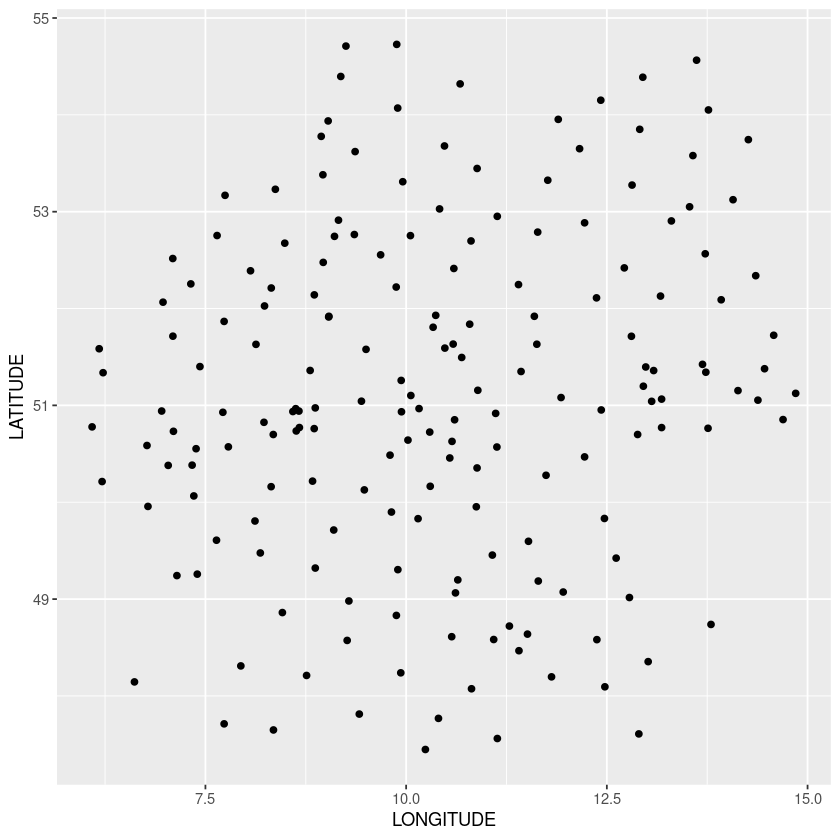

In [17]:
ggplot(data=doculects) + 
    geom_point(aes(x=LONGITUDE, y=LATITUDE))


In [18]:
words

ID,CONCEPT,COUNTERPART,CONCEPTID,DOCULECT,TOKENS,COGID
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
10318,Affe,ɒːph,69,GrossMohrdorf,ɒː ph,1004
10319,Affe,ɔʿfɛ̠,69,GrossJamno,ɔʿ f ɛ̠,1004
10320,Affe,ɑf͡βə,69,Gottsbüren,ɑ f͡β ə,1004
10321,Affe,ɑ̟fə̜+,69,Offdilln,ɑ̟ f ə̜+,1004
10322,Affe,af,69,Iggingen,a f,1004
10323,Affe,a̠ːf͡ɸə,69,Odenspiel,a̠ː f͡ɸ ə,1004
10324,Affe,oʿːχ,69,Wasbek,oʿː χ,1004
10325,Affe,ɒːph,69,Jürgenshagen,ɒː ph,1004
10326,Affe,ɑ̟f,69,Herbornseelbach,ɑ̟ f,1004


In [19]:
freqTable <- words %>% 
    group_by(DOCULECT) %>% 
    summarise(n=n()) %>% 
    arrange(desc(n))

freqTable %>% View

DOCULECT,n
<chr>,<int>
Vietmannsdorf,319
Jesteburg,305
Herdecke,290
Nürnberg,239
Oberau,239
Endenburg,238
Gelting,186
Wittelsberg,185
Bockelwitz,183


In [20]:
doculects

ID,LONGITUDE,LATITUDE,NAME,SHORT_NAME,TRANSCRIPTOR
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
25987,6.61615,48.14471,DOCELLES,Docelles,NA
71182,11.40528,48.46679,SCHACHACH,Schachach,Angelika Braun
71399,11.95648,49.07279,PIELENHOFEN,Pielenhofen,Stern/Braun
71626,12.37579,48.58109,OBERVIEHBACH,Oberviehbach,Stern/Braun
72112,12.78140,49.01600,MAIBRUNN,Maibrunn,R. Lauf
72938,11.52376,49.59651,HARTENSTEIN,Hartenstein,Stern/Braun
73053,11.51153,48.63820,LANGENBRUCK,Langenbruck,Angelika Braun
73067,11.81097,48.19687,GELTING,Gelting,TEAM
74385,11.09074,48.58242,PÖTTMES,Pöttmes,Angelika Braun


In [21]:
doculectsWithFrequency <- freqTable %>% 
    rename(SHORT_NAME = DOCULECT) %>% 
    inner_join(doculects)

doculectsWithFrequency %>% View

Joining, by = "SHORT_NAME"



SHORT_NAME,n,ID,LONGITUDE,LATITUDE,NAME,TRANSCRIPTOR
<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Vietmannsdorf,319,124194,13.53068,53.05063,VIETMANNSDORF,R. Lauf
Jesteburg,305,107810,9.95808,53.30943,JESTEBURG,R. Lauf
Herdecke,290,102156,7.43174,51.40055,HERDECKE,Schönfeldt
Nürnberg,239,77404,11.07393,49.45431,NÜRNBERG,Almeida
Oberau,239,78677,11.13614,47.56027,OBERAU,Angelika Braun
Endenburg,238,132787,7.73306,47.71161,ENDENBURG,Almeida
Gelting,186,73067,11.81097,48.19687,GELTING,TEAM
Wittelsberg,185,100418,8.85498,50.76017,WITTELSBERG,Angelika Braun
Bockelwitz,183,142179,12.95481,51.19788,BOCKELWITZ,V. Harm


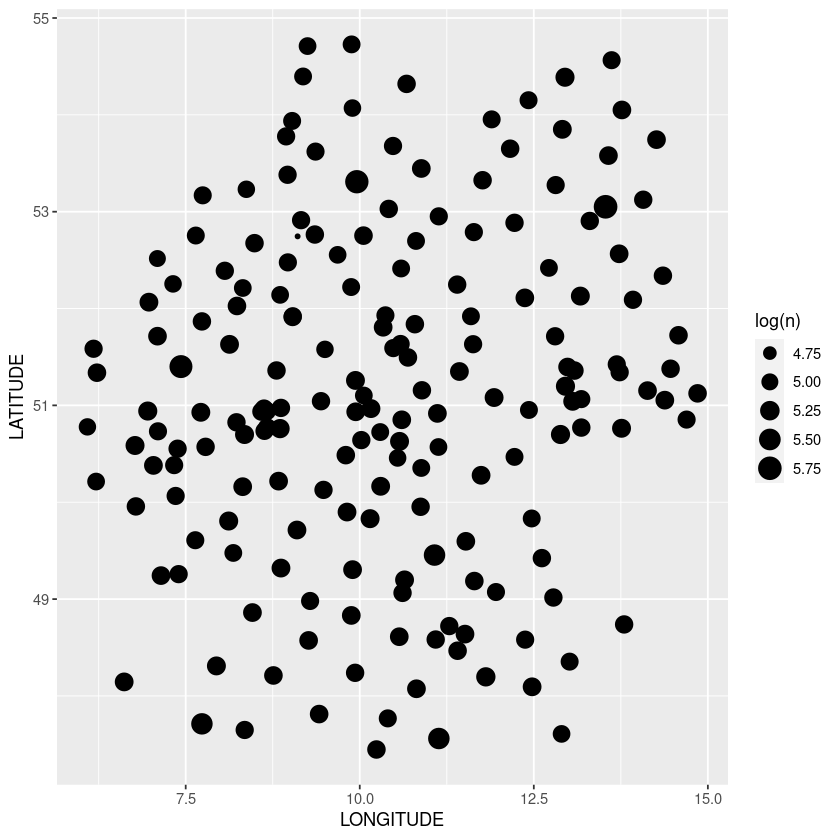

In [22]:
ggplot(data=doculectsWithFrequency) +
    geom_point(aes(x=LONGITUDE, y=LATITUDE, size=log(n)))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



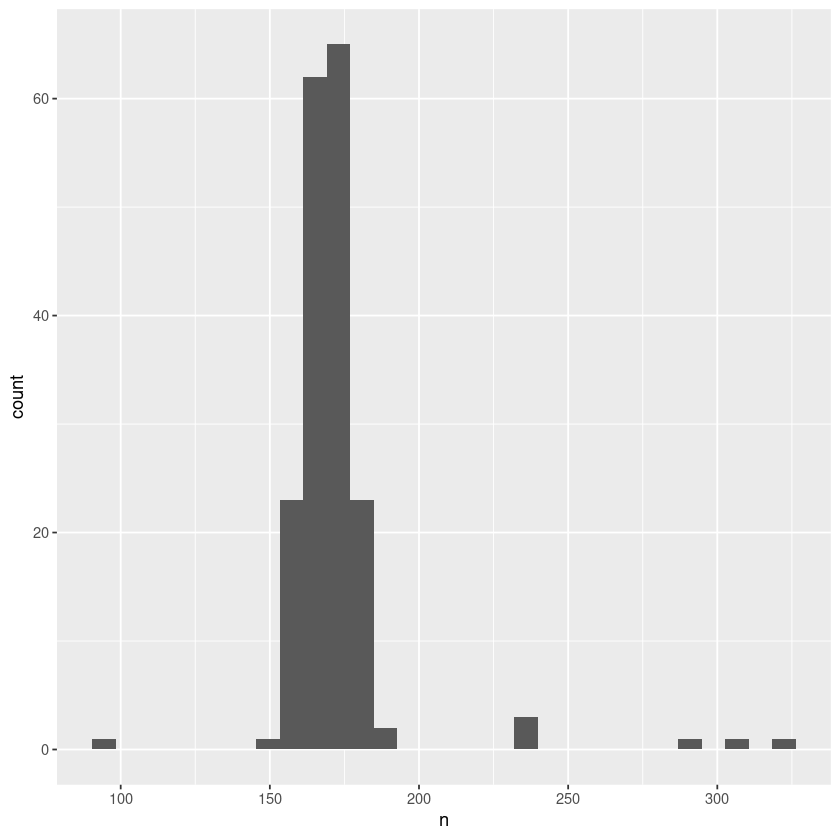

In [23]:
ggplot(data=doculectsWithFrequency) +
    geom_histogram(aes(x=n))


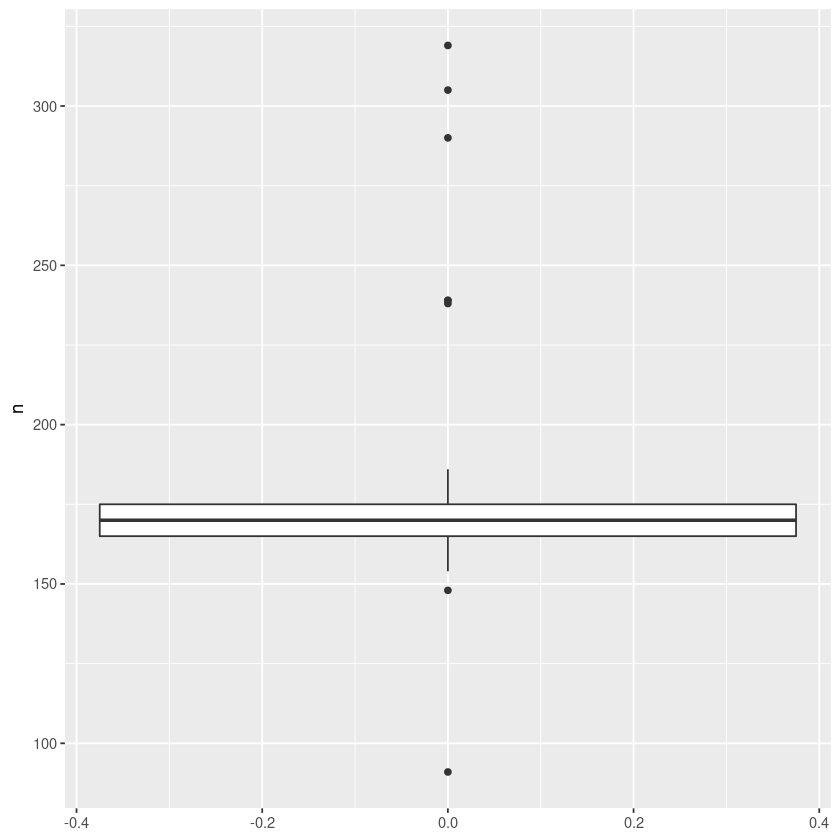

In [24]:
ggplot(data=doculectsWithFrequency) +
    geom_boxplot(aes(y=n))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



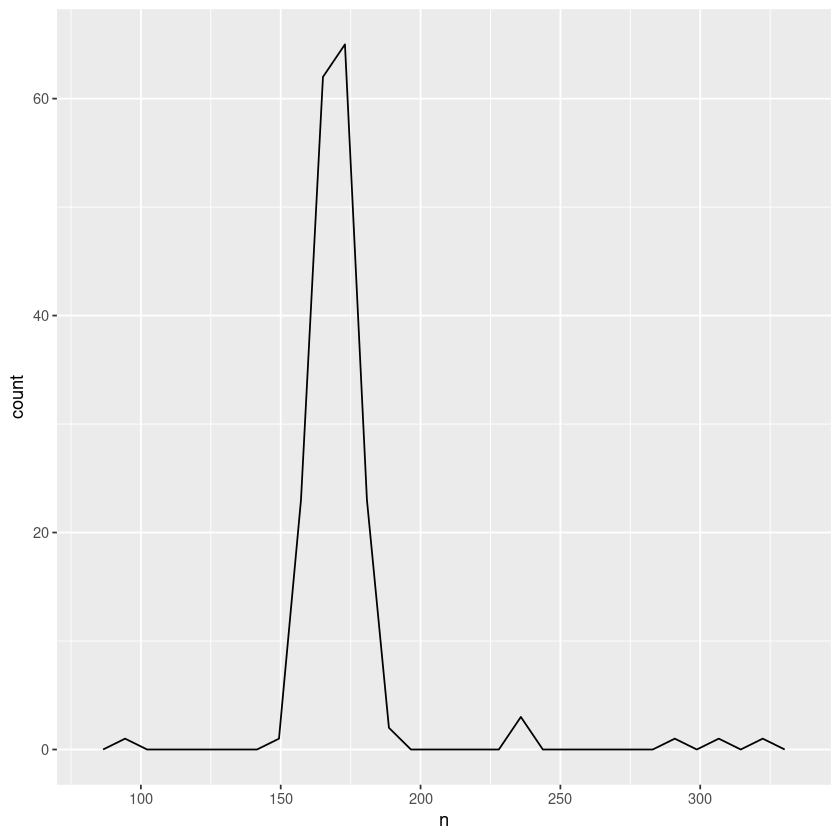

In [25]:
ggplot(data=doculectsWithFrequency) +
    geom_freqpoly(aes(x=n))


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



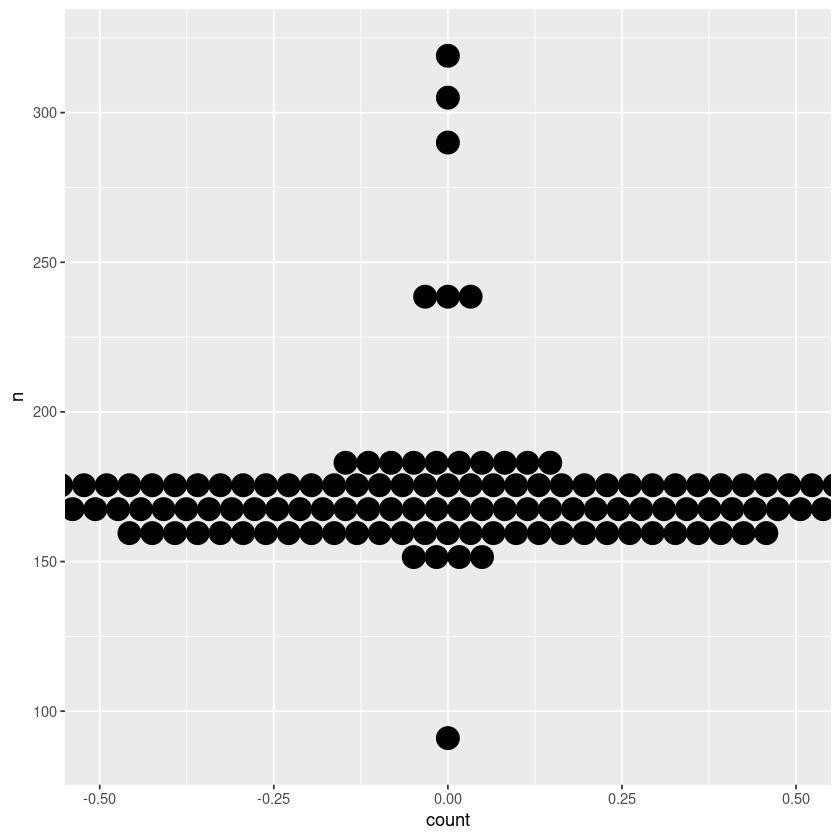

In [26]:
ggplot(data=doculectsWithFrequency) +
    geom_dotplot(aes(x=n), stackdir = 'center') +
    coord_flip()

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



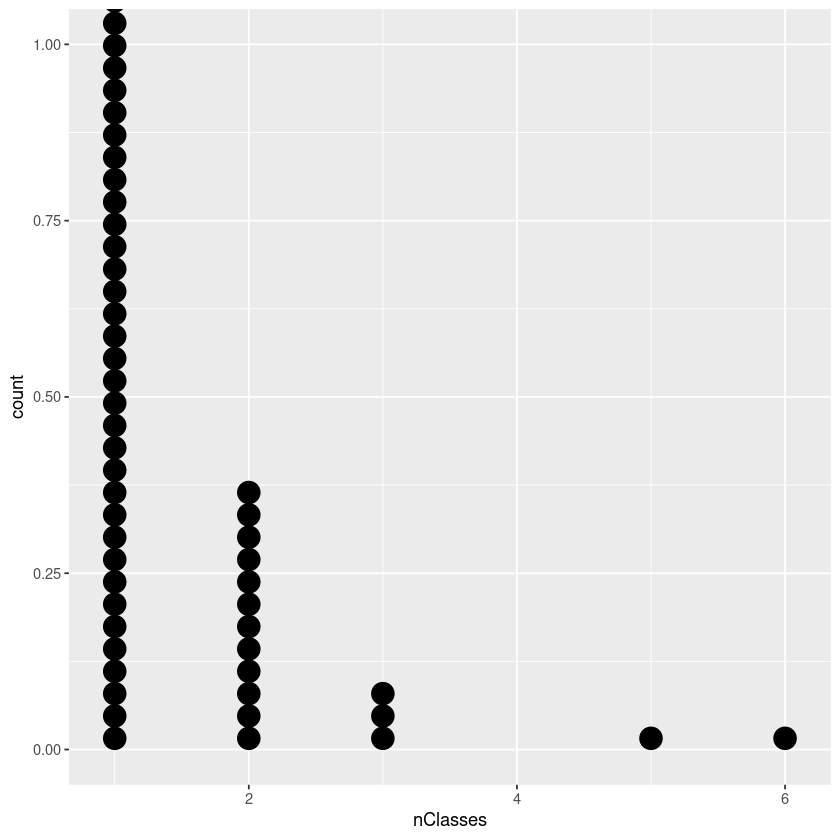

In [27]:
words %>% 
    select(CONCEPT, COGID) %>%
    distinct() %>%
    group_by(CONCEPT) %>%
    summarize(nClasses=n()) %>%
    ggplot() +
        geom_dotplot(aes(x=nClasses))


In [28]:
cogidFreq <- words %>% 
    select(CONCEPT, COGID) %>%
    distinct() %>%
    group_by(CONCEPT) %>%
    summarize(nClasses=n())

cogidFreq %>% 
    filter(nClasses>1) %>%
    arrange(desc(nClasses)) %>%
    View

CONCEPT,nClasses
<chr>,<int>
Dienstag,6
Mittwoch,5
gefallen,3
Samstag,3
wem,3
abend,2
alte,2
austrinken,2
Donnerstag,2


In [29]:
words %>%
    filter(CONCEPT == "Dienstag") %>%
    distinct(COGID, .keep_all=T)

ID,CONCEPT,COUNTERPART,CONCEPTID,DOCULECT,TOKENS,COGID
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
24602,Dienstag,t͡sɪ̣ːʃ̠tɪk̰͡x̟,158,Horheim,t͡s ɪ̣ː ʃ̠ t ɪ k̰͡x̟,1033
24671,Dienstag,nɤɾχta,158,Oberau,n ɤ ɾ χ t a,1188
24702,Dienstag,ɦɪ→ət̪ə,158,Ulbering,ɦ ɪ→ə t̪ ə,1189
24738,Dienstag,ẽ→ʊ̣̃ʃtʰo̜kh,158,Ramsau(Berch),ẽ→ʊ̣̃ ʃ tʰ o̜ kh,1201
24739,Dienstag,ɑftɾ̩mɛt̪ʌ̟k̰h,158,Obermaisel,ɑ f t ɾ̩ m ɛ t̪ ʌ̟ k̰h,1190
24790,Dienstag,ɦe͡ədə,158,Klafferstrass,ɦ e͡ə d ə,1202


In [30]:
words %>%
    filter(CONCEPT == "Dorf") %>%
    distinct(COGID, .keep_all = TRUE)

ID,CONCEPT,COUNTERPART,CONCEPTID,DOCULECT,TOKENS,COGID
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
19873,Dorf,toɾf,129,Allna,t o ɾ f,1035
20014,Dorf,‿tɛʁpʰəbʁɔxth,129,Ahrbergen,t ɛ ʁ pʰ ə b ʁ ɔ x th,1203


In [31]:
words %>%
    filter(CONCEPT == "Mittwoch") %>%
    arrange(COGID) %>% 
    distinct(COGID, .keep_all = TRUE)

ID,CONCEPT,COUNTERPART,CONCEPTID,DOCULECT,TOKENS,COGID
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9957,Mittwoch,metβɔ̣ʁ̟ə,67,Lohrhaupten,m e t β ɔ̣ ʁ̟ ə,1107
10019,Mittwoch,mi̜khə,67,Maibrunn,m i̜ kh ə,1192
9960,Mittwoch,‿χoːz͡sdaɡ‿,67,Wüllen,χ oː z͡s d a ɡ,1197
10033,Mittwoch,jo̜zdɪç,67,Leuth,j o̜ z d ɪ ç,1204
10113,Mittwoch,myʊxŋ̩,67,Ramsau(Berch),m y ʊ x ŋ̩,1205
